# Chapter 5, Exercise 8 

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

## Load Data

In [2]:
iris = datasets.load_iris()
#print(iris)
X = iris['data'][:,(2,3)]  # just grab petal length and width (columns 2 and 3)
y = (iris['target'] == 0).astype(np.float64) # make targets binary on whether they are Iris-Setosa or not

## Define useful functions

In [33]:
def make_mesh_grid(xx, yy, h=0.2):
    """ Creates a mesh grid for plotting
        Parameters
        -----------
        xx: data to base x axis on
        yy: data to base y axis on
        h: step size for mesh grid, optional
        
        Returns
        -------
        xx, yy: ndarray
    """
    x_min, x_max = xx.min()-1, xx.max()+1
    y_min, y_max = yy.min()-1, yy.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [59]:
def plot_data_and_model(X, y, clf=None, **params):
    fig, ax = plt.subplots()
    xx, yy = make_mesh_grid(X[:,0], X[:,1])
    if clf:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, **params)
    ax.scatter(X[:,0], X[:,1], color=['r' if t == 0 else 'b' for t in y], 
               s=50, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.show()

## Plot data

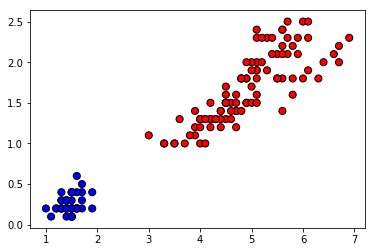

In [60]:
plot_data_and_model(X, y)

## Linear SVC 

In [5]:
# train Linear SVC
from sklearn.svm import  LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc",LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [14]:
print(svm_clf.named_steps.linear_svc.coef_)
print(svm_clf.named_steps.linear_svc.intercept_)

[[-1.26863466 -1.0671077 ]]
[-1.46532782]


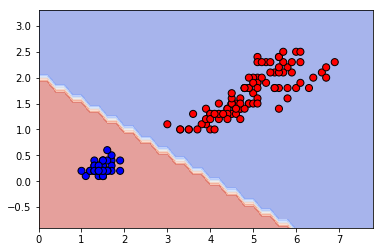

In [67]:
# plot decision function
plot_data_and_model(X, y, svm_clf, cmap=plt.cm.coolwarm, alpha=0.5)

## SVC with linear kernel

In [25]:
# train with an SVC
from sklearn.svm import SVC

svm_clf_02 = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear")),
])

svm_clf_02.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [26]:
print(svm_clf_02.named_steps.svc.coef_)
print(svm_clf_02.named_steps.svc.intercept_)

[[-1.35262604 -1.17026286]]
[-1.65845453]


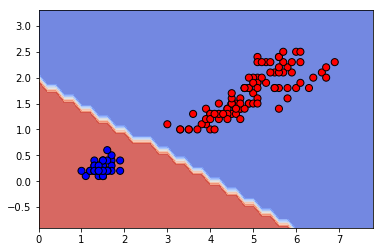

In [68]:
# plot decision function
plot_data_and_model(X, y, svm_clf_02, cmap=plt.cm.coolwarm, alpha=0.8)

## SGD Classifier 

In [74]:
from sklearn.linear_model import SGDClassifier

m = len(y)
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDClassifier(alpha=1/(m))),
])

sgd_clf.fit(X,y)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd', SGDClassifier(alpha=0.006666666666666667, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [72]:
print(sgd_clf.named_steps.sgd.coef_)
print(sgd_clf.named_steps.sgd.intercept_)

[[-1.50361389 -1.21999018]]
[-1.83370725]


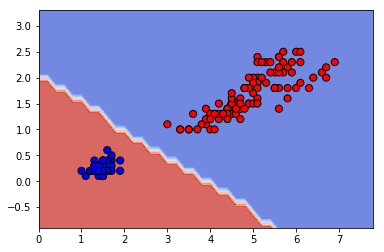

In [73]:
# plot decision function
plot_data_and_model(X, y, sgd_clf, cmap=plt.cm.coolwarm, alpha=0.8)